In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(0)
    indices = np.random.choice(len(X), k, replace=False) # picks k unique indices from the data. These selected points become the starting "centers" of the clusters.
    return X[indices]

# Assign points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) #Assigns each point in X to the nearest centroid based on Euclidean distance.
    return np.argmin(distances, axis=1)

# Recalculates the centroid of each cluster as the mean of all points assigned to it.
def compute_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# Calculate inertia (sum of squared distances)
def compute_inertia(X, labels, centroids):
    return np.sum((X - centroids[labels]) ** 2)

# Full K-Means Algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = compute_centroids(X, labels, k)

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    inertia = compute_inertia(X, labels, centroids)
    return labels, centroids, inertia


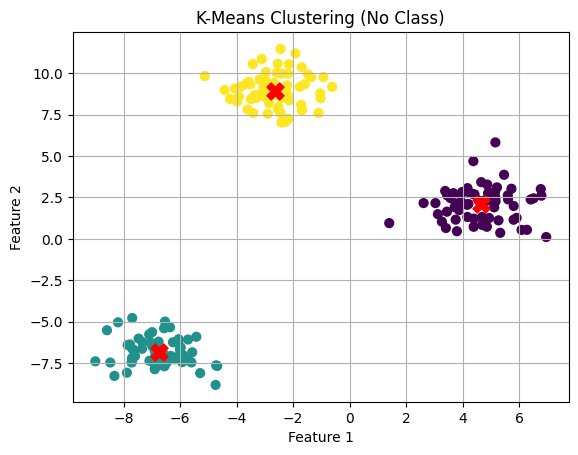

Inertia (SSE): 364.4733211131726


In [2]:
from sklearn.datasets import make_blobs

# Generate a simple dataset
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

# Run K-Means
labels, centroids, inertia = kmeans(X, k=3)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X')
plt.title("K-Means Clustering (No Class)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Print final SSE
print("Inertia (SSE):", inertia)


In [5]:
import pandas as pd

In [ ]:
df = pd.read_csv('Mall_Customers.csv')  
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df[['Age', 'Annual Income (k$)']].values

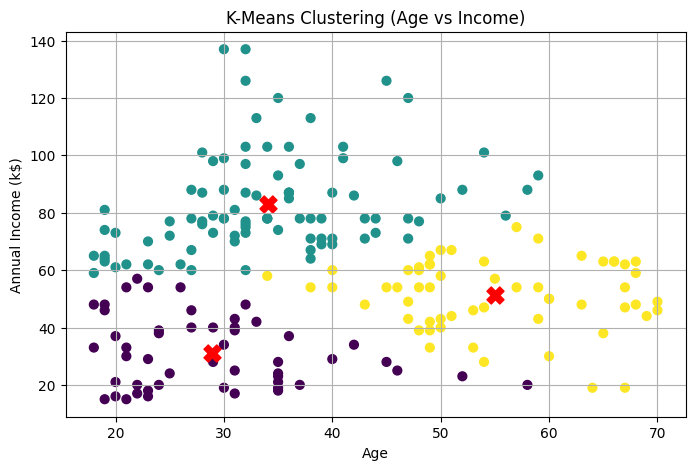

Inertia (SSE): 59525.85757379875


In [9]:
labels, centroids, inertia = kmeans(X, k=3)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X')
plt.title("K-Means Clustering (Age vs Income)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.grid(True)
plt.show()

# Print final SSE
print("Inertia (SSE):", inertia)